In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import *
from src.concept_vectors import *
from src.util import *
import seaborn as sns
from src.dataset import * 
from scipy.spatial.distance import cosine 
from scipy.stats.stats import pearsonr   

2023-02-01 10:41:15.015741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
analyzed_attributes = ["{}_color".format(i) for i in range(4)]
analyzed_attributes += ["{}_number".format(i) for i in range(4)]
analyzed_attributes += ["spurious"]

In [17]:
all_mnist_attributes = MNIST_Dataset().get_attributes()

## Retrieve TCAV Concept Vectors

In [6]:
concept_vectors_tcav = []
concept_metadata_tcav = []

In [7]:
bottlenecks = ["mixed4c"]
experiments_per_concept = 10

In [8]:
for attribute in analyzed_attributes:
    tcav_vectors, tcav_metadata = load_tcav_vectors(attribute,bottlenecks)
    assert len(tcav_metadata) == experiments_per_concept
    concept_vectors_tcav+=list(tcav_vectors)
    concept_metadata_tcav+=tcav_metadata
concept_vectors_tcav = np.array(concept_vectors_tcav)

In [9]:
label_by_concept_tcav = [i['concept'] for i in concept_metadata_tcav]
random_by_concept_tcav = [i['random_concept'] for i in concept_metadata_tcav]

## Retrieve CBM Concept Vectors (from labels)

In [13]:
concept_vectors_cbm = []
concept_metadata_cbm = []

In [14]:
for attribute in analyzed_attributes: 
    cbm_vector = create_vector_from_label_mnist(attribute)
    concept_vectors_cbm += list(cbm_vector)
    concept_metadata_cbm+=[{'concept': attribute}]
concept_vectors_cbm = np.array(concept_vectors_cbm)

results/cem_concepts/mnist/44/mnist_concept_0_active.npy
results/cem_concepts/mnist/44/mnist_concept_2_active.npy
results/cem_concepts/mnist/44/mnist_concept_4_active.npy
results/cem_concepts/mnist/44/mnist_concept_6_active.npy
results/cem_concepts/mnist/44/mnist_concept_1_active.npy
results/cem_concepts/mnist/44/mnist_concept_3_active.npy
results/cem_concepts/mnist/44/mnist_concept_5_active.npy
results/cem_concepts/mnist/44/mnist_concept_7_active.npy
results/cem_concepts/mnist/44/mnist_concept_20_active.npy


In [15]:
label_by_concept_cbm = [i['concept'] for i in concept_metadata_cbm]

## Retrieve CEM Vectors

In [23]:
concept_vectors_cem = []
concept_metadata_cem = []

In [24]:
for attribute in analyzed_attributes: 
    cem_vectors = list(load_cem_vectors_simple(attribute,MNIST_Dataset(),"",44))
    concept_vectors_cem+=cem_vectors
    concept_metadata_cem+=[{'concept': attribute} for j in range(len(cem_vectors))]
concept_vectors_cem = np.array(concept_vectors_cem)

In [25]:
label_by_concept_cem = [i['concept'] for i in concept_metadata_cem]

## Plot all Data

### Dimensionality Reduced Plots 

Text(27.0, 0.5, 'Axis 2')

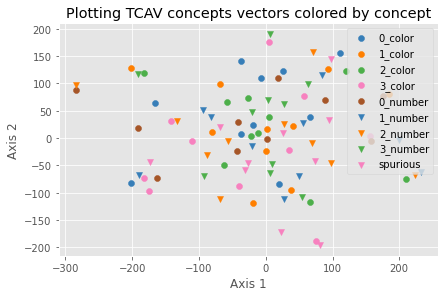

In [21]:
plt.title("Plotting TCAV concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_tcav,label_by_concept_tcav)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

Text(27.0, 0.5, 'Axis 2')

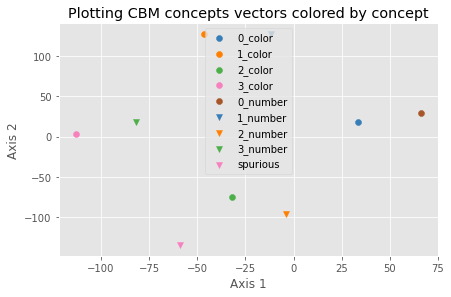

In [17]:
plt.title("Plotting CBM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cbm,label_by_concept_cbm)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

Text(27.0, 0.5, 'Axis 2')

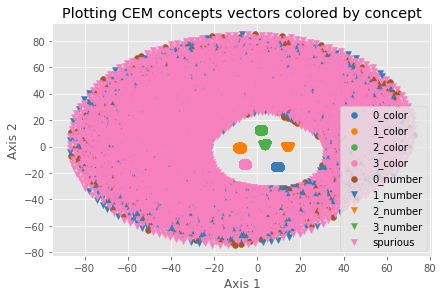

In [26]:
plt.title("Plotting CEM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cem,label_by_concept_cem)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

### Heatmap

In [40]:
cosine_metric = cosine
pearson_metric = lambda a,b: 1-abs(pearsonr(a,b)[0])

Text(0.5, 1.0, 'Heatmap of average pearson distances between TCAV vectors for MNIST attributes, in Latent space')

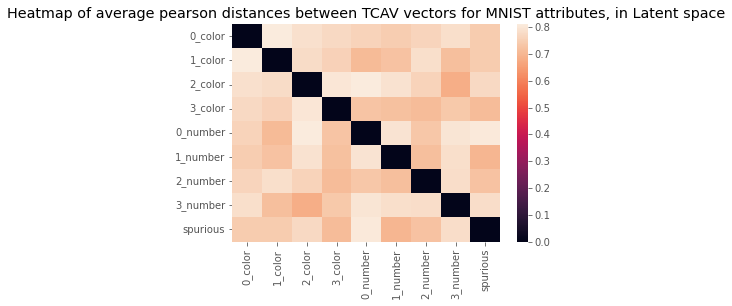

In [29]:
distance_by_class_raw = find_paired_distance(concept_vectors_tcav,encode_list(label_by_concept_tcav),encode_list(random_by_concept_tcav),metric=pearson_metric)
sns.heatmap(distance_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_tcav),
            yticklabels=find_unique_in_order(label_by_concept_tcav))
plt.title("Heatmap of average pearson distances between TCAV vectors for MNIST attributes, in Latent space")

In [13]:
def normalize(v):
    return v/np.linalg.norm(v)

In [15]:
def normalize_many(v):
    return np.array([normalize(i) for i in v])

Text(0.5, 1.0, 'Heatmap of average pearson distances between CBM vectors for MNIST attributes, in Latent space')

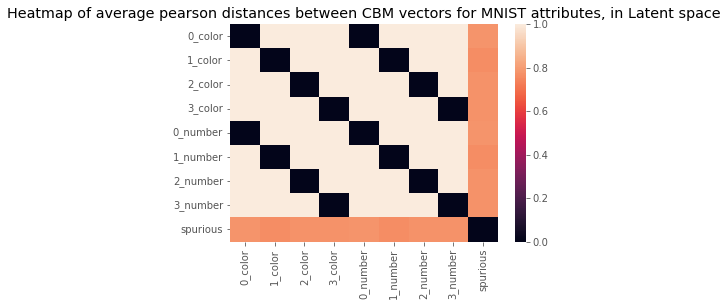

In [21]:
distance_by_class_raw = find_average_distances(concept_vectors_cbm,encode_list(label_by_concept_cbm),metric=cosine_metric)
sns.heatmap(distance_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cbm),
            yticklabels=find_unique_in_order(label_by_concept_cbm))
plt.title("Heatmap of average pearson distances between CBM vectors for MNIST attributes, in Latent space")

Text(0.5, 1.0, 'Heatmap of average L2 distances between CEM vectors for MNIST attributes, in Latent space')

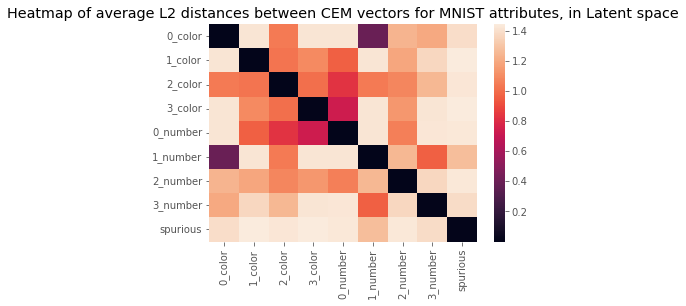

In [16]:
cosine_by_class_raw = find_average_distances(normalize_many(concept_vectors_cem),encode_list(label_by_concept_cem))
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cem),
            yticklabels=find_unique_in_order(label_by_concept_cem))
plt.title("Heatmap of average L2 distances between CEM vectors for MNIST attributes, in Latent space")

## Analyze Low Dimensional Images + CAVs

In [13]:
current_attributes = ["0_number","random500_1","random500_6", "1_number"]
concept_attributes =  [{'concept': '0_number', 'random_concept': 5001}, 
                                             {'concept': '0_number', 'random_concept': 5006}]

In [14]:
activations = load_activations_tcav(list(set(analyzed_attributes).union(current_attributes)))

2022-12-15 22:40:02.863201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 22:40:02.869913: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-15 22:40:08.613926: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Activation spurious is shape (500, 100352)
Activation random500_1 is shape (500, 100352)
Activation 3_number is shape (500, 100352)
Activation 1_number is shape (500, 100352)
Activation 1_color is shape (500, 100352)
Activation 0_number is shape (500, 100352)
Activation random500_6 is shape (500, 100352)
Activation 2_color is shape (500, 100352)
Activation 0_color is shape (500, 100352)
Activation 2_number is shape (500, 100352)
Activation 3_color is shape (500, 100352)


In [15]:
vectors_of_interest = find_vectors_with_data(concept_vectors_tcav, concept_metadata_tcav, concept_attributes)

In [16]:
data = [activations[i] for i in current_attributes]
data += [vectors_of_interest]
data = np.concatenate(data) 
labels = generate_labels_from_activation(current_attributes,activations)

In [17]:
data_embedded = PCA(n_components=2).fit_transform(data)

In [18]:
indices = [current_attributes.index(i['concept']) for i in concept_attributes]
dataset_size = len(activations[list(activations.keys())[0]])

all_centers = np.array([get_center(data_embedded[i*dataset_size:(i+1)*dataset_size]) for i in indices])

Text(27.0, 0.5, 'Axis 2')

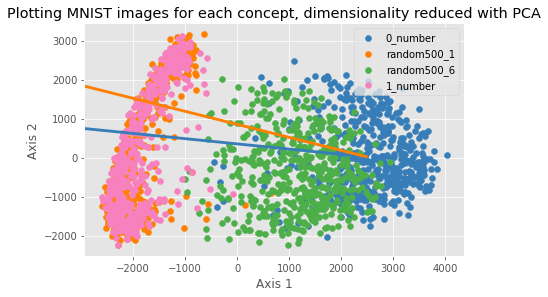

In [19]:
plt.title("Plotting MNIST images for each concept, dimensionality reduced with PCA")
plt.tight_layout()
plot_pca(data[:len(labels)],labels)

plot_arrows(all_centers,data_embedded[-len(all_centers):,:])

plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

### Performing Heatmaps in Low Dimensional Space

In [97]:
data = [activations[i] for i in analyzed_attributes]
data = np.concatenate(data) 
data = np.concatenate([data,concept_vectors_tcav])

In [98]:
data_embedded = PCA(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'Heatmap of average cosine distances between TCAV vectors for MNIST attributes, in dimensionality reduced space')

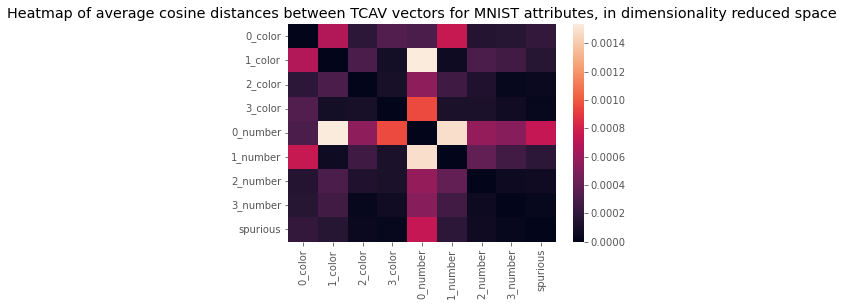

In [109]:
distance_by_class_raw = find_paired_distance(data_embedded[-len(concept_vectors_tcav):],encode_list(label_by_concept_tcav),encode_list(random_by_concept_tcav),metric=cosine_metric)
sns.heatmap(distance_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_tcav),
            yticklabels=find_unique_in_order(label_by_concept_tcav))
plt.title("Heatmap of average cosine distances between TCAV vectors for MNIST attributes, in dimensionality reduced space")